In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
df.shape

(1045, 4)

In [4]:
X = df['Enunciado']
y = df['Contexto']

In [5]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [6]:
def get_new_sentences(da):
    strings=[]
    for elemento in da['Enunciado']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break
    
    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('./arq3.txt')

class LemmaTokenizer(object):
    def __call__(self, text):
        doc=nlp(text)
        tokens=[]
        for token in doc:
            if(token.text.isalpha() and len(token.text)>=2):
                tokens+=[token]
        return [t.lemma_ for t in tokens if t not in nlp.Defaults.stop_words]
pipeline= LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.001,
    C=10.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=10,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=10000,
)

In [7]:
contador=0
predictions=[]
while(contador<len(vetor_X_train)):
    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    X_test=vetor_X_test[contador]
    y_test=vetor_y_test[contador]
    
    text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=nlp.Defaults.stop_words,
                            tokenizer=LemmaTokenizer())),
                     ('clf',pipeline),
    ])
    text_clf_lsvc2.fit(X_train, y_train)

    predictions+=[text_clf_lsvc2.predict(X_test)]

    contador+=1

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acercar', 'algum', 'antar', 'apoiar', 'baixar', 'caminhar', 'ceder', 'cincar', 'comer', 'conhecer', 'custar', 'dever', 'devir', 'direito', 'entrar', 'estevar', 'estivar', 'falto', 'formar', 'grupar', 'irar', 'ligar', 'mear', 'nado', 'nenhum', 'nó', 'o', 'obrigar', 'oitavar', 'orar', 'outro', 'parecer', 'parir', 'pelar', 'pontar', 'pôr', 'quantum', 'quartar', 'querer', 'quietar', 'quintar', 'segundar', 'seriar', 'sobrar', 'suar', 'tardar', 'terceirar', 'umar', 'vezar', 'vir', 'vário'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
y_pred=[]
for lista in predictions:
    for elemento in lista:
        y_pred+=[elemento]

In [9]:
y_test_sla=[]
for lista in vetor_y_test:
    for elemento in lista:
        y_test_sla+=[elemento]

In [10]:
print(metrics.confusion_matrix(y_test_sla,y_pred))

[[ 29   3   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  7  98   0   0   1   0   1   1   0   0   1   2   3   0   0   0   0   0
    0   0   3   0   0   3]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   1   0   1   1   0   0   0
    1   0   1   0   0   1]
 [  0   0   0   0   0  77   0   0   0   1   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  38   0   0   0   0   0   1   0   0   0   3   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  29   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   0   0   0   1   0   0  32   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   1   0   0   0   9   0   0   1   0   0   0   0   0
    0   0   0   0

In [11]:
print(metrics.classification_report(y_test_sla,y_pred))

                 precision    recall  f1-score   support

       Bancário       0.74      0.83      0.78        35
      Comercial       0.83      0.82      0.82       120
  Computacional       1.00      1.00      1.00         6
        Consumo       1.00      1.00      1.00        16
    Data e hora       0.83      0.71      0.77        21
        Escolar       0.95      0.97      0.96        79
        Esporte       0.95      0.90      0.93        42
Filmes e séries       0.97      0.97      0.97        30
         Física       0.86      0.89      0.88        36
      Geografia       0.69      0.82      0.75        11
        Imposto       0.80      0.80      0.80         5
          Jogos       0.88      0.88      0.88        96
     Matemático       0.92      0.96      0.94       261
  Meio ambiente       0.94      0.89      0.91        18
         Outros       0.82      0.76      0.79        59
       Pesquisa       1.00      1.00      1.00        18
         Pessoa       0.81    

In [12]:
print(metrics.accuracy_score(y_test_sla,y_pred))

0.8937799043062201


In [13]:
mat_etc = confusion_matrix(y_test_sla, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)

In [14]:
norm_conf_mx = mat_etc / row_sums

In [15]:
labels = ['Bancário','Comercial','Computacional','Consumo','Data e hora','Escolar','Esportes',
         'Filmes e séries','Física','Geogragia','Imposto','Jogos','Matemático',
          'Meio ambiente','Outros','Pesquisa','Pessoa','População','Produção',
         'Química','RH','Saúde','Segurança','Trânsito']

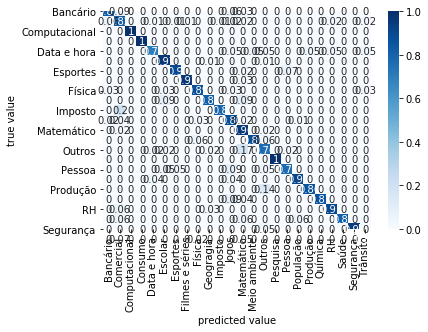

In [16]:
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');